# Complete Flight Passenger Analysis using Python

***Aim:***

*There is a lot of flights going to and from now-a-days. As a data analyst you have been hired to assist companies, increasing their sales and business.*

*You have been shared with customer satisfactions survey on various parameters. Identify the Key important parameters that can bring in more customers and have a positive impact on their journey*

***Problem Statement:***

*In the effort to provide a seamless and personalized passenger journey to air travellers, the travel industry must continuously adapt to market changes and new technology.*

*In this context, company has carried out the Global Passenger Survey since 2012, which has been designed to provide objective and in-depth insights into the preferences and behaviours of air travellers all around the world.*

In [70]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Load the Data
df_1 = pd.read_csv("C:\\Users\\dines\\Downloads\\Flight Passenger Analysis Using Python\\passenger data.csv")
df_2 = pd.read_csv("C:\\Users\\dines\\Downloads\\Flight Passenger Analysis Using Python\\survery data.csv")

## Data Information

### There are 2 csv files that are shared here.

**A.     Passenger Data**
*      id - id assigned to the each customer
*      Gender - Gender of customer
*      Customer Type - The customer type (Loyal customer, disloyal customer)
*      Age - The actual age of the passengers
*      Type of travel - Purpose of the flight of the passengers (Personal Travel, Business Travel) 
*      Class - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
*      Flight Distance - The flight distance of this journey

In [72]:
df_1.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance
0,114960,Female,Loyal Customer,55,Business travel,Business,2001
1,43337,Male,Loyal Customer,36,Business travel,Eco,387
2,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235
3,98299,Female,Loyal Customer,11,Personal Travel,Eco,1072
4,70039,Male,Loyal Customer,39,Business travel,Eco,183


**B.      Survery Data**
*        id - id assigned to the each customer
*        Inflight wifi service - Satisfaction level of the inflight wifi service (0 Not Applicable ; 1-5)
*        Departure/Arrival time convenient - Satisfaction level of Departure/Arrival time convenient
*        Ease of Online booking - Satisfaction level of online booking
*        Gate location - Satisfaction level of Gate location
*        Food and drink - Satisfaction level of Food and drink
*        Online boarding - Satisfaction level of online boarding
*        Seat comfort - Satisfaction level of Seat comfort
*        Inflight entertainment - Satisfaction level of inflight entertainment
*        On-board service - Satisfaction level of On-board service
*        Leg room service - Satisfaction level of Leg room service
*        Baggage handling - Satisfaction level of baggage handling
*        Checkin service - Satisfaction level of Check-in service
*        Inflight service - Satisfaction level of inflight service
*        Cleanliness - Satisfaction level of Cleanliness
*        Departure Delay in Minutes - Minutes delayed when departure
*        Arrival Delay in Minutes - Minutes delayed when Arrival
*        satisfaction - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [73]:
df_2.head()

,id,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [74]:
# Merging Datasets into a single Dataframe

df = pd.merge(df_1 , df_2 , how = "inner" , left_on = "id" , right_on = "id")

In [75]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,114960,Female,Loyal Customer,55,Business travel,Business,2001,2,2,2,...,4,4,4,4,4,4,3,24,21.0,satisfied
1,114960,Female,Loyal Customer,55,Business travel,Business,2001,2,2,2,...,4,4,4,4,4,4,3,24,21.0,satisfied
2,43337,Male,Loyal Customer,36,Business travel,Eco,387,3,5,2,...,3,1,1,1,2,1,3,0,1.0,neutral or dissatisfied
3,43337,Male,Loyal Customer,36,Business travel,Eco,387,3,5,2,...,3,1,1,1,2,1,3,0,1.0,neutral or dissatisfied
4,74692,Female,Loyal Customer,17,Personal Travel,Eco,1235,3,4,3,...,4,3,5,5,3,4,4,3,0.0,neutral or dissatisfied


In [76]:
# replacing a satisfaction status in Satisfaction column
df = df.replace({"satisfaction" : {"satisfied" : "Yes" , "neutral or dissatisfied" : "No"}})

In [77]:
# Set id as index
df = df.set_index("id")

In [78]:
#get the number of rows and columns 
df.shape

(122454, 23)

In [79]:
# get the column data types and there info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122454 entries, 114960 to 74494
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             122454 non-null  object 
 1   Customer Type                      122454 non-null  object 
 2   Age                                122454 non-null  int64  
 3   Type of Travel                     122454 non-null  object 
 4   Class                              122454 non-null  object 
 5   Flight Distance                    122454 non-null  int64  
 6   Inflight wifi service              122454 non-null  int64  
 7   Departure/Arrival time convenient  122454 non-null  int64  
 8   Ease of Online booking             122454 non-null  int64  
 9   Gate location                      122454 non-null  int64  
 10  Food and drink                     122454 non-null  int64  
 11  Online boarding                    

In [80]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             369
satisfaction                           0
dtype: int64

## Data Cleaning 

###  Cleaning Arrival Delay in Minutes feature

If we check above we have a ArrivalDelayInMinutes column contaning the null values which is 369, We will first try to clean it.For cleaning the ArrivalDelayInMinutes column 

In [83]:
print(df["Arrival Delay in Minutes"].mean())
print(df["Arrival Delay in Minutes"].mode())
print(df["Arrival Delay in Minutes"].median())
print(df["Arrival Delay in Minutes"].max())

15.44580415284433
0    0.0
Name: Arrival Delay in Minutes, dtype: float64
0.0
1584.0


In [84]:
# Droping null values row
df.dropna( axis = 0 ,inplace = True)

In [85]:
df.isnull().sum().sum()

0

In [86]:
# dealing with duplicates values
df.duplicated().sum()

1451

In [87]:
# lets Drop duplicate rows
df = df.drop_duplicates()

In [88]:
df.duplicated().sum()

0

In [89]:
# Checking for datatypes for each variable
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [90]:
ratingList = list(df.columns)
ratingList = ratingList[6:20]
ratingList

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

*The Variables name metioned in  ratinglist are numerical datatype but, actually it is rating and rating is categorical datatype* 

In [91]:
# Let us convert in categorical datatype
for i in ratingList:
    df[i] = df[i].astype("category")


In [92]:
# Checking for datatypes for each variable
df.dtypes

Gender                                 object
Customer Type                          object
Age                                     int64
Type of Travel                         object
Class                                  object
Flight Distance                         int64
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

## Let us categories the columns based on numerical and categorical 

In [93]:
numeric_data = df.select_dtypes(include=[np.number]).columns
categorical_data = df.select_dtypes(exclude=[np.number]).columns


categorical_data

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [94]:
numeric_data

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

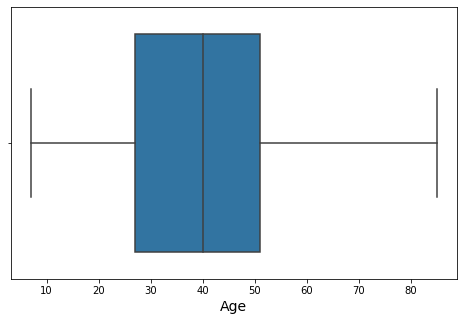

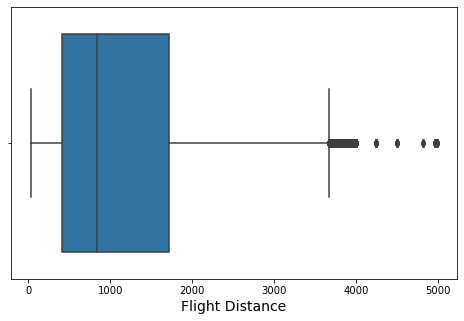

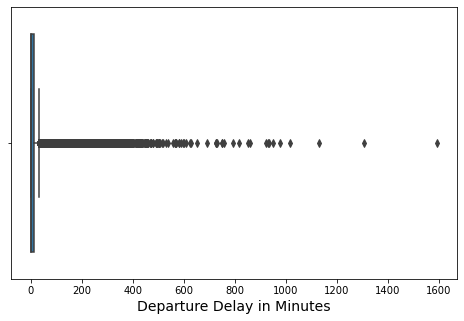

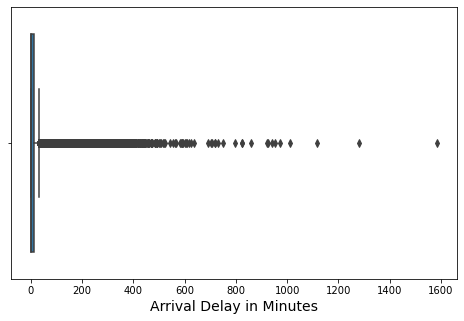

In [109]:
# let us find the outrliers in our dataset
for i in numeric_data:
    plt.figure(figsize=(8,5))  
    sns.boxplot(x=df[i])
    plt.xlabel(i, fontsize=14)
plt.show()    

In [117]:
# Checking for outliers in the continuous variables
num_churn = df[numeric_data]

In [118]:
num_churn.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,120634.000000,120634.000000,120634.000000,120634.000000
mean,39.405599,1179.093614,15.050516,15.434032
std,15.112555,995.690255,38.576343,39.089339
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,409.000000,0.000000,0.000000
50%,40.000000,837.000000,0.000000,0.000000
75%,51.000000,1712.750000,13.000000,13.000000
90%,59.000000,2751.000000,44.000000,45.000000
95%,64.000000,3384.000000,78.000000,80.000000
99%,70.000000,3884.000000,182.000000,184.000000


*From the distribution shown above, we can see that ArrivalDelayInMinutes,Departure Delay in Minutes both having lagrge number of outliers*
*Flight Distance column also having a outliers*

## Univariate Analysis 

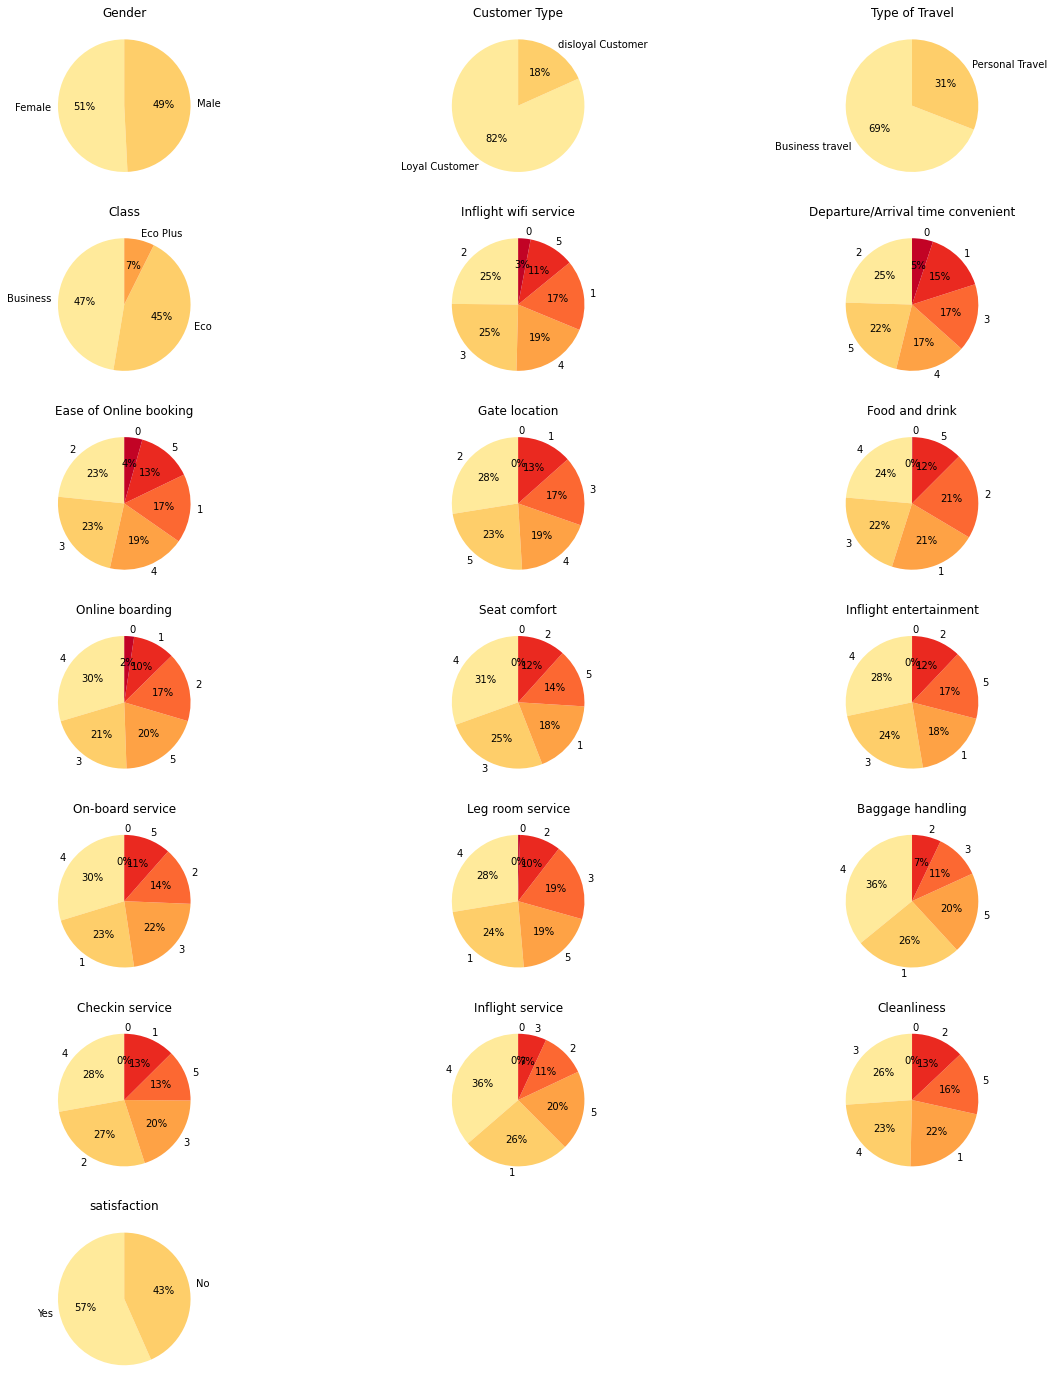

In [120]:
plt.figure(figsize = (20 , 25))
for i , col in enumerate(categorical_data) : 
    plt.subplot(7,3,i+1).set_title(col)
    plt.pie(df[col].value_counts(), labels=df[col].unique(),colors = sns.color_palette("YlOrRd"), autopct='%1.0f%%' , startangle = 90)
  

*Some conclusions about the considered sample:*
*     The number of men and women in this sample is approximately the same.
*     Most of the airline's customers are Loyal customer.
*     Most of our clients flew for business rather than personal reasons.
*     About half of the passengers were in business class.
*     More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5).
*     More than 60% of passanger were happy with Baggage handling (rated 4-5 out of 5).
*     More than 60% of passanger were happy with Inflight service (rated 4-5 out of 5).

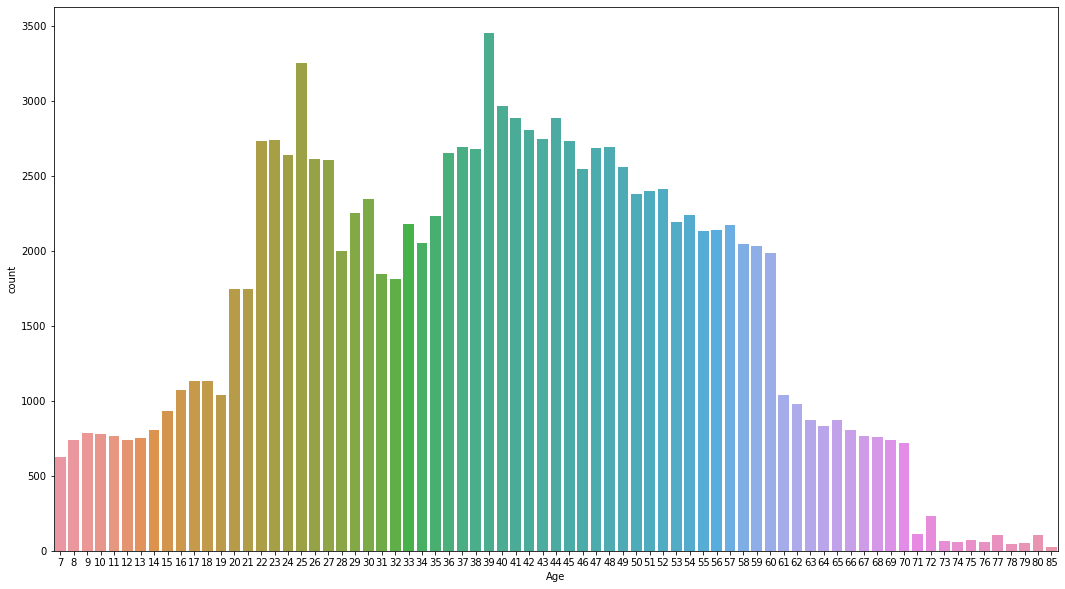

In [114]:
plt.figure(figsize = (18,10))
sns.countplot(data = df ,x = "Age")
plt.show()

*Most of the clients are between 20 to 60 Age*

## Bivariate Analysis 

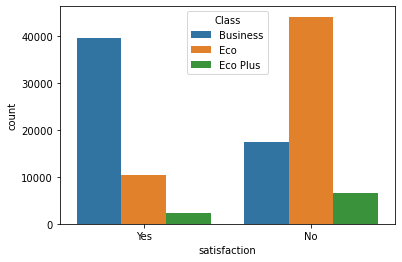

In [116]:
sns.countplot( data = df , x = "satisfaction" , hue = "Class")
plt.show()

*You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied.*

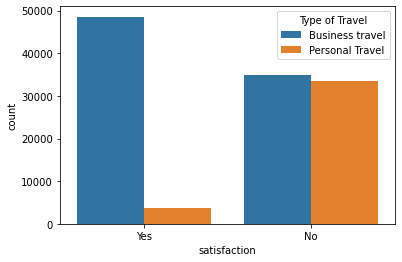

In [38]:
sns.countplot( data = df , hue = "Type of Travel" , x = "satisfaction" )
plt.show()

*Most of the passengers who flew for business travel were satisfied and most of the passengers who flew for personal travel were dissatisfied.*

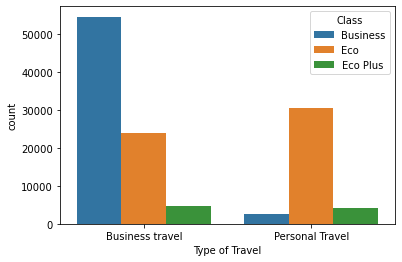

In [65]:
sns.countplot( data = df , x = "Type of Travel" , hue = "Class" )
plt.show()

*Almost all business class customer are business travelers.*

*Business travelers tend to travel in business class may be their companies paid for the tickets for them, while personal travelers prefer economy class which they can afford it.*

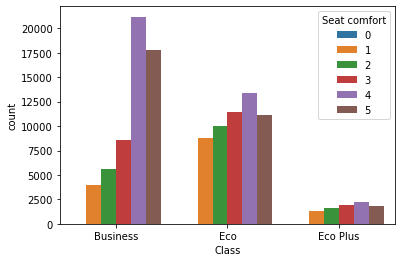

In [43]:
sns.countplot(data = df, hue= "Class" , x = "Seat comfort")
plt.show()

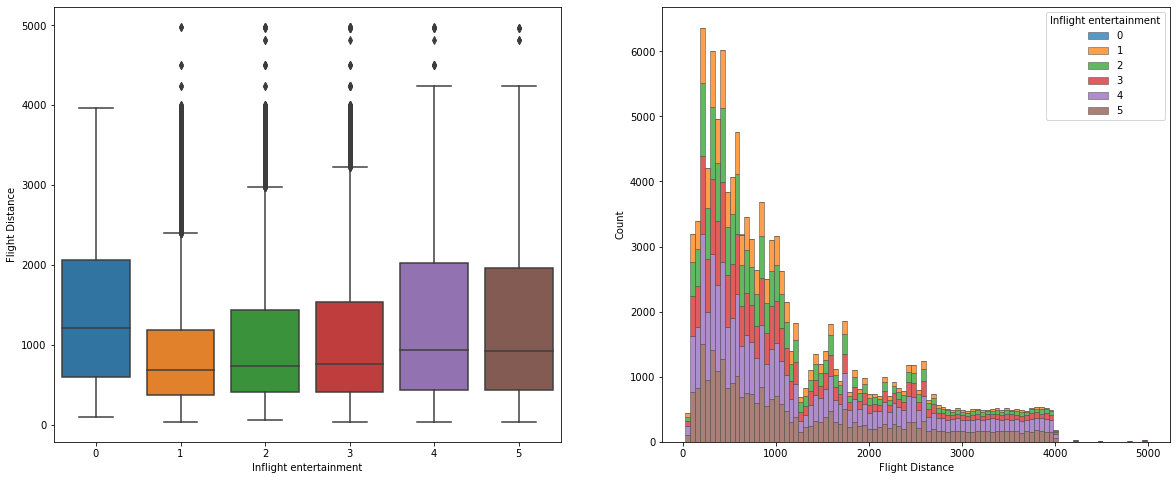

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (20,8))
sns.boxplot( data = df , x = "Inflight entertainment", y = "Flight Distance", ax = ax[0])
sns.histplot(df , x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack",  edgecolor = ".3", linewidth = .5, ax = ax[1])
plt.show()

*The following pattern can be seen: the more distance an aircraft passenger travels ( the longer they are in flight), the more they are satisfied with the entertainment in flight.*

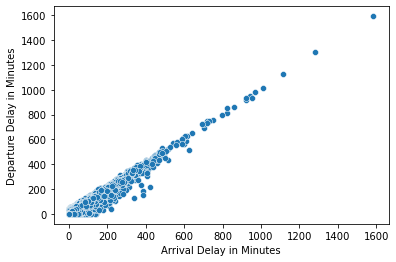

In [121]:
sns.scatterplot(data = df, x = "Arrival Delay in Minutes" , y = "Departure Delay in Minutes" )
plt.show()

*There's a linear proportional relationship between Departure Delay and Arrival Delay, and that's logica because flight duration is almost constant.*

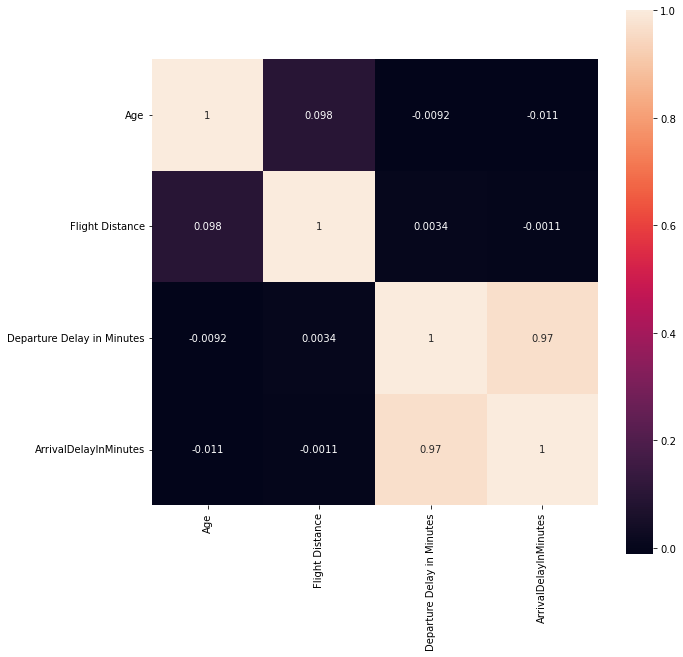

In [48]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, annot=True);

***Results***

*   The number of men and women in this sample is approximately the same.
*   Most of the airline's customers are Loyal customer.
*   Most of our clients flew for business rather than personal reasons.
*   About half of the passengers were in business class.
*   More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5).
*   More than 60% of passanger were happy with Baggage handling (rated 4-5 out of 5).
*   More than 60% of passanger were happy with Inflight service (rated 4-5 out of 5).
*   Most travelers who participated in the survey are between 20 and 60 years old
*   You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and       those who were lucky enough to fly in business class were satisfied.
*   Most of the passengers who flew for business travel were satisfied and most of the passengers who flew for personal travel     were dissatisfied.
*   Almost all business class customer are business travelers.
*   Business travelers tend to travel in business class may be their companies paid for the tickets for them, while personal       travelers prefer economy class which they can afford it.
*   the more distance an aircraft passenger travels ( the longer they are in flight), the more they are satisfied with the         entertainment in flight.
*   There's a linear proportional relationship between Departure Delay and Arrival Delay, and that's logica because flight         duration is almost constant.